In [1]:
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import sklearn
import sklearn.datasets

Task 1: Implementing a Logistic Regression Model

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [51]:
def logistic_regression(X, y, learning_rate=0.01, batch_size=100, threshold=0.5, max_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0

    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    while not stopping:
        idx = np.random.choice(len(y))
        xi = X[idx]
        yi = y[idx]

        z = np.dot(w, xi) + b
        y_hat = sigmoid(z)

        J_current = binary_cross_entropy(yi, y_hat)

        dw = (y_hat - yi) * xi
        db = y_hat - yi

        w -= learning_rate * dw
        b -= learning_rate * db

        iteration += 1
        J_running += J_current

        if iteration > max_iter:
            stopping = True

        if (iteration % batch_size) == 0:
            if np.abs(J_running - J_running_prev) < threshold:
                stopping = True
            J_running_prev = J_running
            J_running = 0

    return w, b

In [52]:
def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_pred_prob = sigmoid(z)
    y_pred = (y_pred_prob >= threshold).astype(int)
    return y_pred, y_pred_prob

In [53]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

Loading the Dataset (Code copy pasted from Load-Small-Datasets.ipynb)

In [54]:
# Use pandas to read the CSV file as a dataframe
df1 = pd.read_csv("blobs600.csv")

# The y values are those labelled 'Class': extract their values
y1 = df1['Class'].values

# The x values are all other columns
del df1['Class']   # drop the 'Class' column from the dataframe
X1 = df1.values     # convert the remaining columns to a numpy array

In [55]:
print(f"The dimensions of the dataset are: {np.shape(X1)}")

The dimensions of the dataset are: (600, 3)


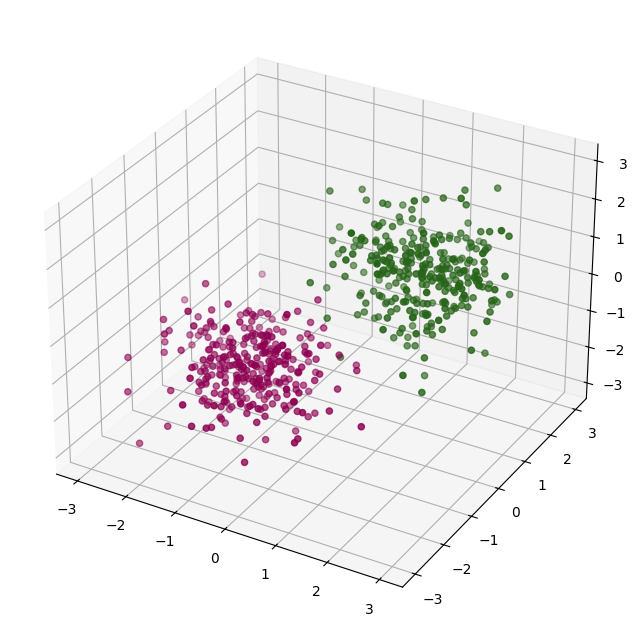

In [56]:
# Plot the dataset in 3D, with colours according to the class label

fig = plt.figure(figsize=(8, 8)) # set the size to 8x8
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1, cmap="PiYG") # changed the colour map because why not

plt.show()
plt.close(fig)

In [57]:
# Use pandas to read the CSV file as a dataframe
df2 = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
y2 = df2['Class'].values

# The x values are all other columns
del df2['Class']   # drop the 'Class' column from the dataframe
X2 = df2.values     # convert the remaining columns to a numpy array

In [58]:
# Check its dimensions

print(f"The dimensions of Dataset 2 are: {np.shape(X2)}")

The dimensions of Dataset 2 are: (500, 2)


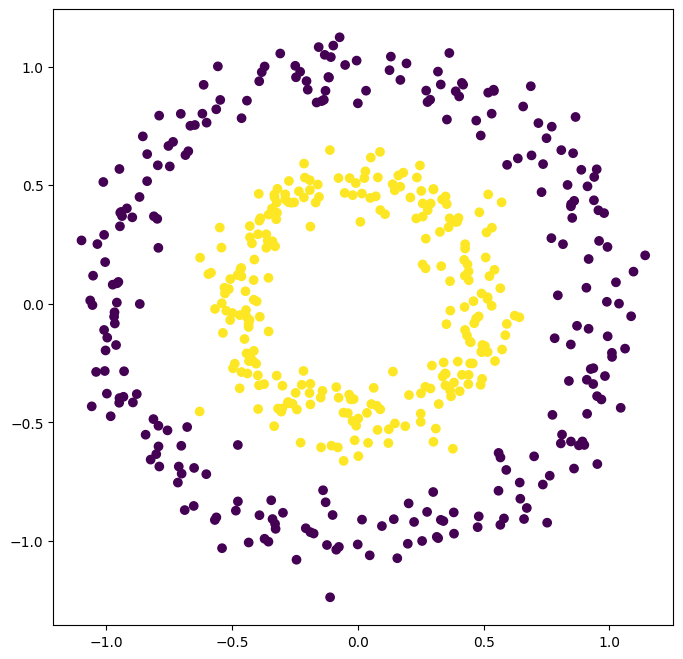

In [59]:
# plot X[0] vs X[1] and colour points according to the class, y

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X2[:,0], X2[:,1], c=y2)

plt.show()
plt.close(fig)

In [60]:
# Some examples of working with the data, to look at rows/columns
print ("len(X2):", len(X2))            # outer array: one per sample
print ("len(X2[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X2[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X2: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y2)", len(y2))
print ("np.shape(y2):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y2 transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X2): 500
len(X2[0]): 2
len(X2[:,0]): 500
X2: nsamples = 500 , nattribs = 2
len(y2) 500
np.shape(y2): (500,)
np.shape(yt): (500, 1)
y2 transpose: nsamples = 500 , nattribs = 1


Task 2: Training and Evaluation

In [61]:
np.random.seed(42)
indices = np.random.permutation(len(X1))
X1_shuffled = X1[indices]
y1_shuffled = y1[indices]

In [62]:
X1_train, X1_val, X1_test = np.split(X1_shuffled, [int(.7*len(X1)), int(.85*len(X1))])
y1_train, y1_val, y1_test = np.split(y1_shuffled, [int(.7*len(y1)), int(.85*len(y1))])

In [63]:
w1, b1 = logistic_regression(X1_train, y1_train)

In [64]:
y1_pred, y1_pred_prob = predict(X1_val, w1, b1)

In [65]:
print(f"Accuracy on Dataset 1: {accuracy(y1_val, y1_pred)}")

Accuracy on Dataset 1: 1.0


In [66]:
y1_pred, y1_pred_prob = predict(X1_test, w1, b1)

In [67]:
print(f"Accuracy on Dataset 1: {accuracy(y1_test, y1_pred)}")

Accuracy on Dataset 1: 1.0


In [68]:
np.random.seed(42)
indices = np.random.permutation(len(X2))
X2_shuffled = X2[indices]
y2_shuffled = y2[indices]

In [69]:
X2_train, X2_val, X2_test = np.split(X2_shuffled, [int(.7*len(X2)), int(.85*len(X2))])
y2_train, y2_val, y2_test = np.split(y2_shuffled, [int(.7*len(y2)), int(.85*len(y2))])

In [70]:
w2, b2 = logistic_regression(X2_train, y2_train)

In [71]:
y2_pred, y2_pred_prob = predict(X2_val, w2, b2)

In [72]:
print(f"Accuracy on Dataset 2: {accuracy(y2_val, y2_pred)}")


Accuracy on Dataset 2: 0.5066666666666667


In [73]:
y2_pred, y2_pred_prob = predict(X2_test, w2, b2)

In [74]:
print(f"Accuracy on Dataset 2: {accuracy(y2_test, y2_pred)}")


Accuracy on Dataset 2: 0.4266666666666667


Task 3: Implementing a Shallow Neural Network

In [28]:
def initialize_parameters(n_input, n_hidden):
    # Small random initialization to break symmetry
    np.random.seed(42)
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(1, n_hidden) * 0.01
    b2 = 0

    return W1, b1, W2, b2

In [29]:
def forward_propagation(x, W1, b1, W2, b2):
    x = x.reshape(-1, 1)
    # Hidden layer
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)

    # Output layer
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    return z1, a1, z2, a2

In [30]:
def backward_propagation(x, y, a1, a2, W2):
    x = x.reshape(-1, 1)
    # Output layer gradients
    dz2 = a2 - y
    dW2 = np.dot(dz2, a1.T)
    db2 = dz2

    # Hidden layer gradients
    dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)  # element-wise multiplication
    dW1 = np.dot(dz1, x.T)
    db1 = dz1

    return dW1, db1, dW2, db2

In [31]:
def shallow_neural_network(X, y, n_hidden_nodes=4, learning_rate=0.01, batch_size=100, threshold=1e-4, max_iter=10000):

    n_samples, n_input = X.shape

    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden_nodes)

    # Training loop variables
    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    while not stopping:
        # Select single random example (stochastic gradient descent)
        idx = np.random.choice(n_samples)
        xi = X[idx]
        yi = y[idx]

        # Forward propagation
        z1, a1, z2, a2 = forward_propagation(xi, W1, b1, W2, b2)

        # Compute loss
        J_current = binary_cross_entropy(yi, a2)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(xi, yi, a1, a2, W2)

        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Update iteration counter and running loss
        iteration += 1
        J_running += J_current

        # Check stopping criteria
        if iteration > max_iter:
            stopping = True
            print(f"Stopped: Max iterations ({max_iter}) reached")

        if (iteration % batch_size) == 0:
            if np.abs(J_running - J_running_prev) < threshold:
                stopping = True
                print(f"Converged at iteration {iteration}")
            J_running_prev = J_running
            J_running = 0

    return W1, b1, W2, b2

In [32]:
def predict_nn(X, W1, b1, W2, b2, threshold=0.5):
    n_samples = X.shape[0]
    y_pred_prob = np.zeros(n_samples)

    # Forward propagation for each sample
    for i in range(n_samples):
        _, _, _, a2 = forward_propagation(X[i], W1, b1, W2, b2)
        y_pred_prob[i] = a2.flatten()[0]

    y_pred = (y_pred_prob >= threshold).astype(int)

    return y_pred, y_pred_prob

### Testing the Shallow Neural Network

Let's test the neural network on both datasets and compare with logistic regression.


In [33]:
W1_d1, b1_d1, W2_d1, b2_d1 = shallow_neural_network(X1_train, y1_train)


y1_train_pred_nn, _ = predict_nn(X1_train, W1_d1, b1_d1, W2_d1, b2_d1)
y1_val_pred_nn, _ = predict_nn(X1_val, W1_d1, b1_d1, W2_d1, b2_d1)
y1_test_pred_nn, _ = predict_nn(X1_test, W1_d1, b1_d1, W2_d1, b2_d1)

print(f"Training Accuracy: {accuracy(y1_train, y1_train_pred_nn):.4f}")
print(f"Validation Accuracy: {accuracy(y1_val, y1_val_pred_nn):.4f}")
print(f"Test Accuracy: {accuracy(y1_test, y1_test_pred_nn):.4f}")

Stopped: Max iterations (10000) reached
Training Accuracy: 0.9952
Validation Accuracy: 1.0000
Test Accuracy: 1.0000


In [50]:
W1_d2, b1_d2, W2_d2, b2_d2 = shallow_neural_network(
    X2_train, y2_train,
    n_hidden_nodes=10,
    learning_rate=0.1,
    batch_size=100,
    threshold=1e-4,
    max_iter=35000
)

# Evaluate
y2_train_pred_nn, _ = predict_nn(X2_train, W1_d2, b1_d2, W2_d2, b2_d2)
y2_val_pred_nn, _ = predict_nn(X2_val, W1_d2, b1_d2, W2_d2, b2_d2)
y2_test_pred_nn, _ = predict_nn(X2_test, W1_d2, b1_d2, W2_d2, b2_d2)

print(f"Training Accuracy: {accuracy(y2_train, y2_train_pred_nn):.4f}")
print(f"Validation Accuracy: {accuracy(y2_val, y2_val_pred_nn):.4f}")
print(f"Test Accuracy: {accuracy(y2_test, y2_test_pred_nn):.4f}")

Stopped: Max iterations (35000) reached
Training Accuracy: 0.9857
Validation Accuracy: 0.9867
Test Accuracy: 1.0000


Task 4: Tackle a Challenging Task

In [75]:
data = np.load("emnist_letters_85800.npz")

x_data = data["x"]
y_data = data["y"]

In [76]:
# Do some data checks ...

# Check how many different classes we have: should be 26
n_classes =len(np.unique(y_data))
print(f"The number of unique classes is {n_classes} (should be 26).")

# check that images are scaled: min should be 0, max should be 1
img = x_data[0]
print(f"\nFor a single image, the min value is {img.min()} and the max is {img.max()} (should be 0.0 and 1.0).")

# Check the shape of the two classes
print(f"\nShape of x_data is {x_data.shape}, shape of y_data is {y_data.shape} (should have 85,800 cases and x should be 28x28).")

The number of unique classes is 26 (should be 26).

For a single image, the min value is 0.0 and the max is 1.0 (should be 0.0 and 1.0).

Shape of x_data is (85800, 28, 28, 1), shape of y_data is (85800,) (should have 85,800 cases and x should be 28x28).


In [77]:
# Extract just two classes from the dataset

# PUT YOUR OWN CLASS NUMBERS HERE: remember that A=1, z=26.
c1 = 17   # example
c2 = 22  # example

mask = (y_data == c1) | (y_data == c2)

x_binary = x_data[mask]
y_binary = y_data[mask]

# Now change labels to 0 and 1
y_binary = (y_binary == c2).astype(int)

In [78]:
# To help you examine your data, here is a graph to plot 48  images in a grid, starting from an index you specify.

def plot_grid(x, y, n):
    plt.figure(figsize=(12, 10))

    for i in range(48):
        idx = n + i

        plt.subplot(6, 8, i + 1)
        plt.imshow(x[idx].squeeze(), cmap="gray")
        plt.title(int(y[idx]))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

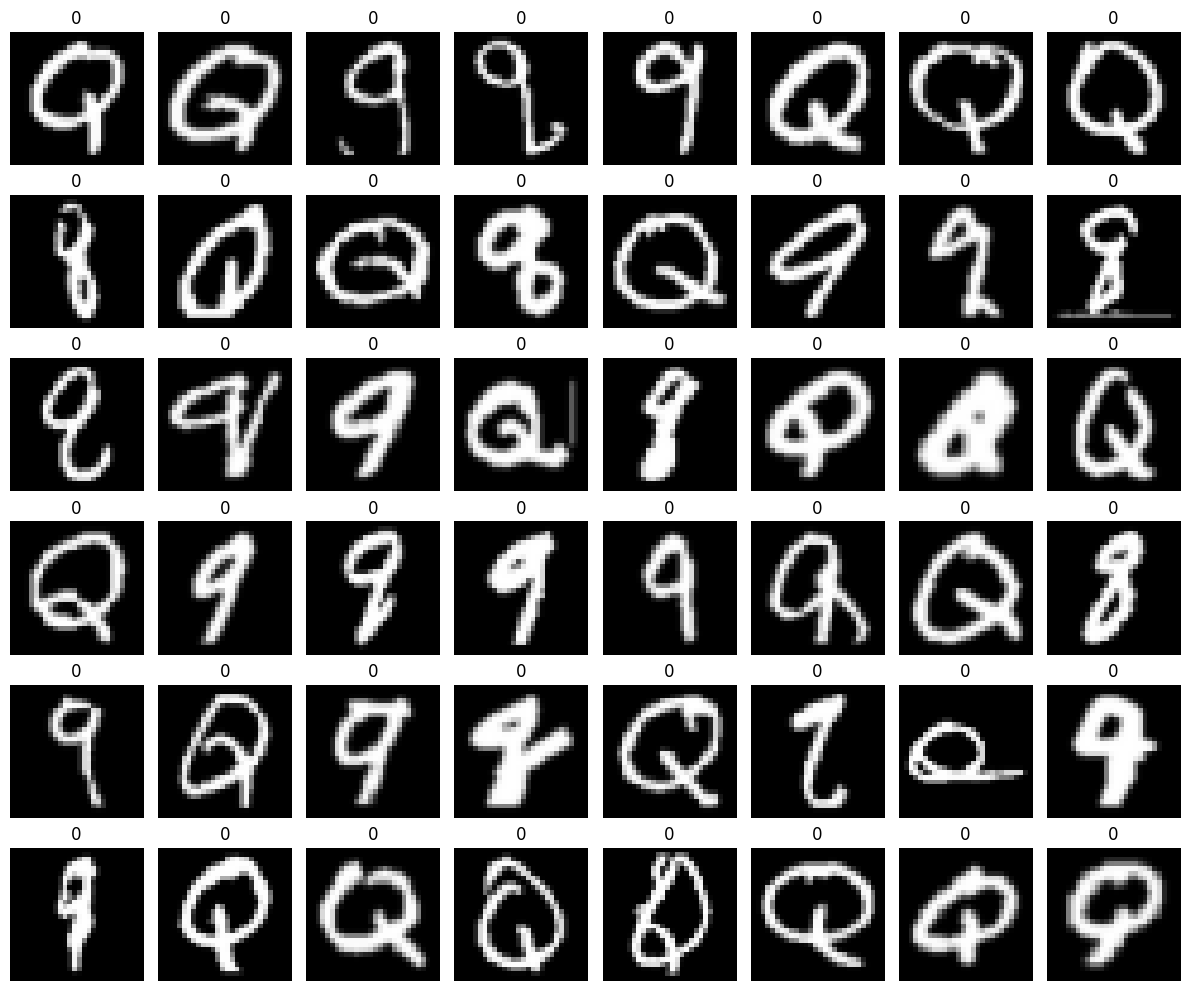

In [79]:
# Let's check images at the start - will all have label 0

plot_grid(x_binary, y_binary, n=0)

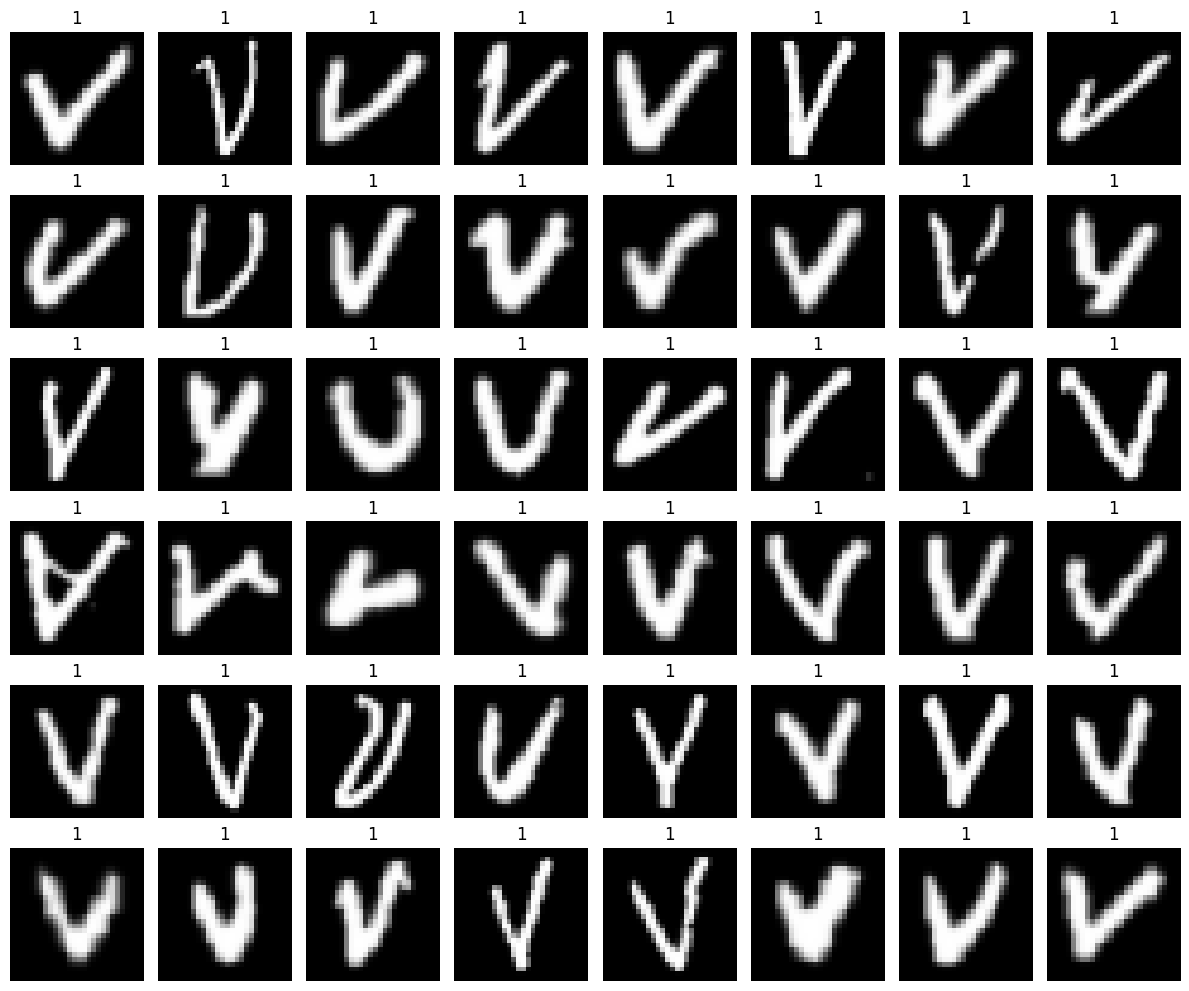

In [80]:
# Now check images after 3300 - will all have label 1

plot_grid(x_binary, y_binary, n=3300)